# 1.5 決定理論
[View on nbviewer](http://nbviewer.ipython.org/gist/Ushiki/b9a5e1faf4a2e74cc492)

In [1]:
%config InlineBackend.figure_format = 'svg'
%matplotlib inline
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.optimize import root
import matplotlib.font_manager as fm

# 1.5.1 誤識別率の最小化

p1(x) を $p(x,\ C_1)$ 、p2(x) を $p(x,\ C_2)$ とすると、 p1(x), p2(x)は
\begin{align}
\int_{-\infty}^{\infty} p(x,\ C_k) dx = p(C_k)
\end{align}
を満たし
\begin{align}
p(C_1) + p(C_2)  = 1
\end{align}
となる

In [2]:
# 規格化する前 
def pre_p1(x):
    return np.exp( - (x + 2) ** 2 ) + 0.5 * np.exp( - (x - 1) ** 2 )

def pre_p2(x):
    return np.exp( - ((x - 2)) ** 2)

# 規格化定数
n1 = quad(pre_p1, -np.infty, np.infty)[0]
n2 = quad(pre_p2, -np.infty, np.infty)[0]

pC1 = 0.65
pC2 = 1 - pC1


def p1(x):
    """ 入力変数xとクラスC1の同時分布 """
    return pC1 * 1 / n1 * pre_p1(x)

def p2(x):
    """ 入力変数xとクラスC2の同時分布 """
    return pC2 * 1 / n2 * pre_p2(x)

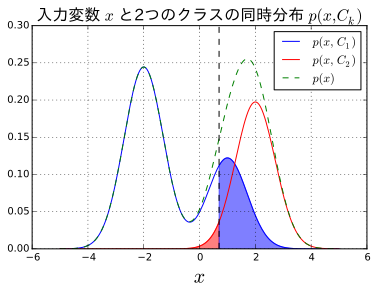

In [3]:
x = np.linspace(-5, 5, 200)
plt.plot(x, p1(x), 'b-', label=r'$p(x,\ C_1)$')
plt.plot(x, p2(x), 'r-', label=r'$p(x,\ C_2)$')
plt.plot(x, p1(x) + p2(x), 'g--', label=r'$p(x)$')

#　適当なxハット
tmpx0 = 0.7
plt.axvline(tmpx0, ymin=0, ymax=1, color='k', linestyle='--')
tmpr1 = np.linspace(-5, tmpx0, 200)
tmpr2 = np.linspace(tmpx0, 5, 200)
plt.fill_between(tmpr1, p2(tmpr1), color='r', alpha=0.5)
plt.fill_between(tmpr2, p1(tmpr2), color='b', alpha=0.5)

plt.grid()
plt.ylim(0, 0.3)
plt.legend()
plt.xlabel(r'$x$', fontsize=20)
prop = fm.FontProperties(fname=r'C:\Windows\Fonts\ipaexg.ttf')
plt.title(u'入力変数 $x$ と2つのクラスの同時分布 $p(x, C_k)$', fontproperties=prop, fontsize=16)

誤識別率を計算するための関数を定義する  
式(1.78)に従って、領域 $R_1$ での $p(x,\ C_2)$ の積分値と領域 $R_2$ での $p(x,\ C_1)$ の積分値の和を計算するものである

In [4]:
def getMissIdent(x):
    """ 入力変数xを誤ったクラスに分類する確率 式1.78に従って """
    # 決定領域R1, R2 この領域に入ったxはそれぞれクラスC1, C2に割り当てられる
    r1 = [-np.infty, x]
    r2 = [x, np.infty]
    # クラスC2の入力変数をクラスC1に割り当ててしまう確率
    I1 = quad(p2, r1[0], r1[1])
    # クラスC2の入力変数をクラスC1に割り当ててしまう確率
    I2 = quad(p1, r2[0], r2[1])
    return I1[0] + I2[0]

gmis = np.array([getMissIdent(t) for t in np.linspace(-5, 5, 200)])
# gmis が最小となるxが領域を分けるときの最適な点
x0 = x[gmis == gmis.min()]

誤識別率をプロットする  
その図からわかるように最小化するような $x$ は二つの同時分布の交点になるところである

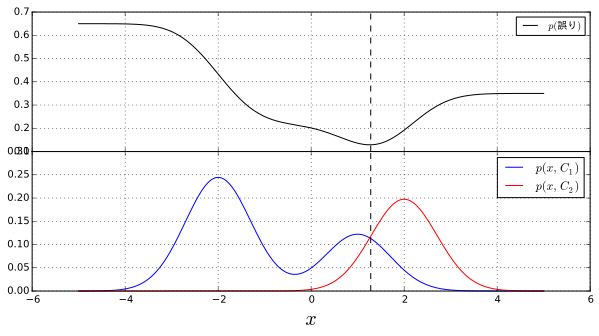

In [5]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(10, 5))
ax1.plot(x, gmis, 'k-', label=u'$p($誤り$)$')
ax1.axvline(x0, ymin=0, ymax=1, linestyle='--', color='k')
ax1.grid()
ax1.legend(prop=prop)

ax2.plot(x, p1(x), 'b-', label=r'$p(x,\ C_1)$')
ax2.plot(x, p2(x), 'r-', label=r'$p(x,\ C_2)$')
ax2.axvline(x0, ymin=0, ymax=1, linestyle='--', color='k')
ax2.grid()
ax2.set_ylim(0, 0.3)
ax2.legend()
ax2.set_xlabel(r'$x$', fontsize=20)
fig.subplots_adjust(hspace=0)
plt.show()

# 1.5.3 棄却オプション

\begin{align}
p(x) = \sum_{k=1, 2} p(x,\ C_k) \\
p(C_k\ |\ x) = \frac{p(C_k,\ x)}{p(x)}
\end{align}
クラス $C_k$ 全てに対し、
$p(C_k | x)$ の最大値が**しきい値** $\theta$ 以下の入力変数 $x$ の領域は棄却され、人または別のアルゴリズムでクラス分類する

In [6]:
def p(x):
    return p1(x) + p2(x)

# 事後確率
def post_p1(x):
    return p1(x) / p(x)

def post_p2(x):
    return p2(x) / p(x)

# しきい値
theta = 0.8
# 棄却される領域のmin, max
reject_min = root(lambda x: post_p1(x) - theta, 0).x[0]
reject_max = root(lambda x: post_p2(x) - theta, 0).x[0]
print reject_min
print reject_max

0.568704951785
1.95336104511


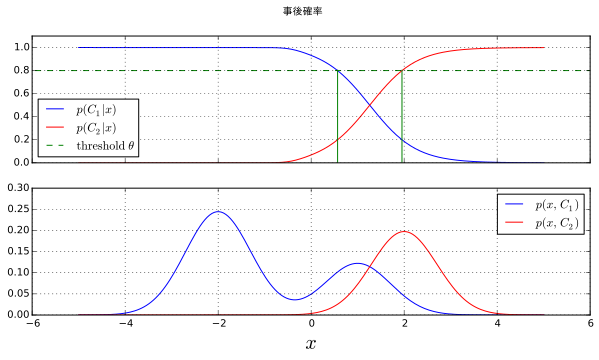

In [7]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(10, 5))

ax1.plot(x, post_p1(x), 'b-', label=r'$p(C_1|x)$')
ax1.plot(x, post_p2(x), 'r-', label=r'$p(C_2|x)$')
ax1.axhline(theta, -5, 5, label=r'$\rmthreshold\ \theta$', color='g', linestyle='--')
ax1.axvline(reject_min, ymin=0, ymax=theta-0.07, color='g')
ax1.axvline(reject_max, ymin=0, ymax=theta-0.07, color='g')
ax1.legend(loc='lower left')
ax1.grid()
ax1.set_ylim(0, 1.1)


ax2.plot(x, p1(x), 'b-', label=r'$p(x,\ C_1)$')
ax2.plot(x, p2(x), 'r-', label=r'$p(x,\ C_2)$')
ax2.grid()
ax2.set_ylim(0, 0.3)
ax2.legend()
ax2.set_xlabel(r'$x$', fontsize=20)

fig.subplots_adjust()
plt.suptitle(u'事後確率', fontproperties=prop, fontsize=25)
plt.show()

---
同時分布 $p(x,\ C_k)$ の定義と、それをもとにshape (dataNum, 2) のデータを生成する関数を定義

In [8]:
#　同時分布
def pxc(x, c):
    if c == 0:
        return p1(x)
    elif c == 1:
        return p2(x)
    else:
        return None

# PDFからデータを生成
def makeTrnData(dataNum=1000, pMax=0.25):
    data = []
    for i in xrange(dataNum):
        while True:
            x = np.random.uniform(-5, 5)
            c = np.random.randint(0, 2)
            if np.random.uniform(0, pMax) <= pxc(x, c):
                data.append([x, c])
                break
    return np.array(data)

データを生成

In [9]:
dataNum = 2 * pow(10, 3)
data = makeTrnData(dataNum, 0.25)

# C1, C2 クラスに属する入力変数 X
# 一つ目のスライシングで、データの内 x だけを取ってきて
# 二つ目のスライシングで、それぞれのクラスのデータだけを取ってくる
dataC1 = data[:, 0][data[:, 1] == 0]
dataC2 = data[:, 0][data[:, 1] == 1]

# 頻度主義で p(C1), p(C2) を計算
dataPC1 = len(dataC1) / dataNum
dataPC2 = len(dataC2) / dataNum
print 'p(C1): ', dataPC1
print 'p(C2): ', dataPC2

p(C1):  0.671
p(C2):  0.329


---
脱線するが、
```
np.all(data[:, 0][data[:, 1] == 0] == data[data[:, 1] == 0][:, 0]) => True
```
となって等しいが、左辺のほうが先に、dataの0列目を抽出しているので、扱うデータが削減できて速い

In [10]:
%timeit data[:, 0][data[:, 1] == 0]

100000 loops, best of 3: 15.2 µs per loop


In [11]:
%timeit data[data[:, 1] == 0][:, 0]

10000 loops, best of 3: 61.3 µs per loop


---
真の分布とデータを一緒にプロットする

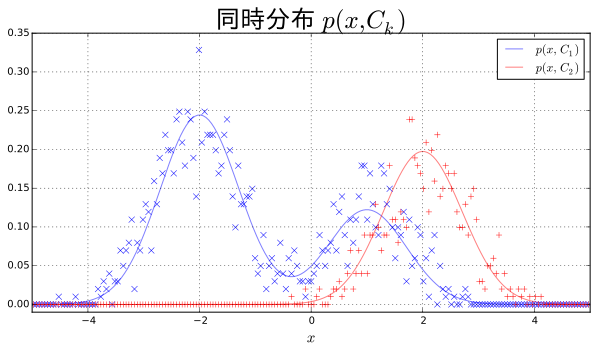

In [12]:
fig, ax = plt.subplots(1,1)
# hist を利用して、ヒストグラムの高さを height1, 2 として得る プロットはしない
# 規格化してあるので、height1, height2 は p(x|c1), p(x|c2)
# 注意： len(height1, 2) == len(x) - 1 => getMiddle() を定義した
height1, bins1, patches1 = ax.hist(dataC1, x, alpha=0.5, color='b', normed=True)
height2, bins2, patches2 = ax.hist(dataC2, x, alpha=0.5, color='r', normed=True)
plt.close()

fig, ax1 = plt.subplots(1, 1, figsize=(10, 5))
# 真の分布
ax1.plot(x, p1(x), 'b-', alpha=0.5, label=r'$p(x,\ C_1)$')
ax1.plot(x, p2(x), 'r-', alpha=0.5, label=r'$p(x,\ C_2)$')


def getMiddle(x):
    """ len(x) => len(x) - 1 にして、hist()で作ったheight1, 2のデータ数と揃える"""
    if type(x) is np.ndarray:
        return (x[1:] + x[:-1]) / 2
    else:
        return getMiddle(np.array(x))

# データの分布
# p(x, C_k) = p(x|C_k) * p(C_k)
ax1.plot(getMiddle(x), height1 * dataPC1, 'bx')
ax1.plot(getMiddle(x), height2 * dataPC2, 'r+')

ax1.legend()
ax1.set_xlim(-5, 5)
ax1.set_ylim(ymin=-0.01)
ax1.grid()
ax1.set_xlabel(r'$x$', fontsize=15)
plt.title(u'同時分布 $p(x, C_k)$', fontproperties=prop, fontsize=25)
plt.show()

C:\Python27\lib\site-packages\IPython\kernel\__main__.py:5: RuntimeWarning: invalid value encountered in true_divide
C:\Python27\lib\site-packages\IPython\kernel\__main__.py:6: RuntimeWarning: invalid value encountered in true_divide


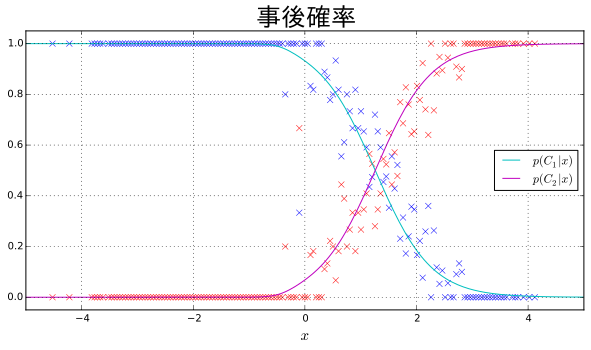

In [13]:
# p(x) = p(x|C1)p(C1) + p(x|C2)p(C2)
dataPx = height1 * dataPC1 + height2 * dataPC2

ax2 = plt.figure(figsize=(10, 5)).add_subplot(111)
ax2.plot(getMiddle(x), height1 * dataPC1 / dataPx, 'bx')
ax2.plot(getMiddle(x), height2 * dataPC2 / dataPx, 'rx')
ax2.plot(x, p1(x) / (p1(x) + p2(x)), 'c-', label=r'$p(C_1|x)$')
ax2.plot(x, p2(x) / (p1(x) + p2(x)), 'm-', label=r'$p(C_2|x)$')

ax2.legend(loc='best')
ax2.set_xlabel(r'$x$', fontsize=15)
ax2.set_xlim(-5, 5)
ax2.set_ylim(-0.05, 1.05)
ax2.grid()
plt.title(u'事後確率', fontproperties=prop, fontsize=25)
plt.show()